In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Predator-Prey Relation with Logistic Growth

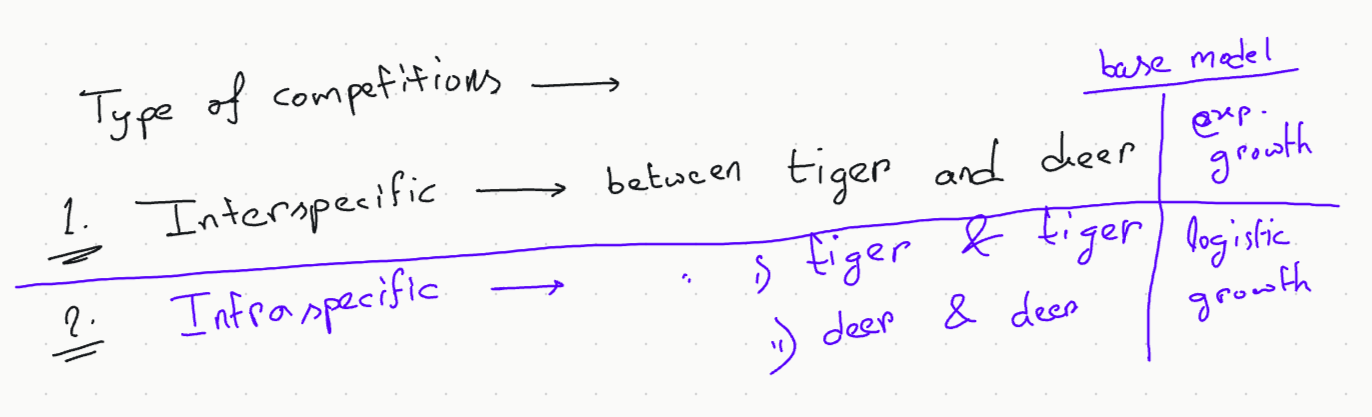


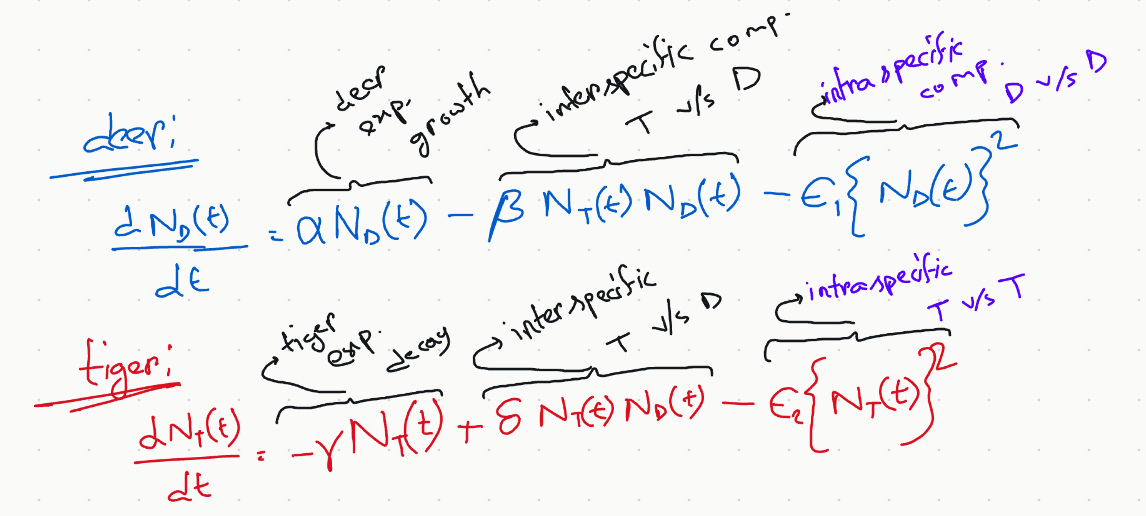

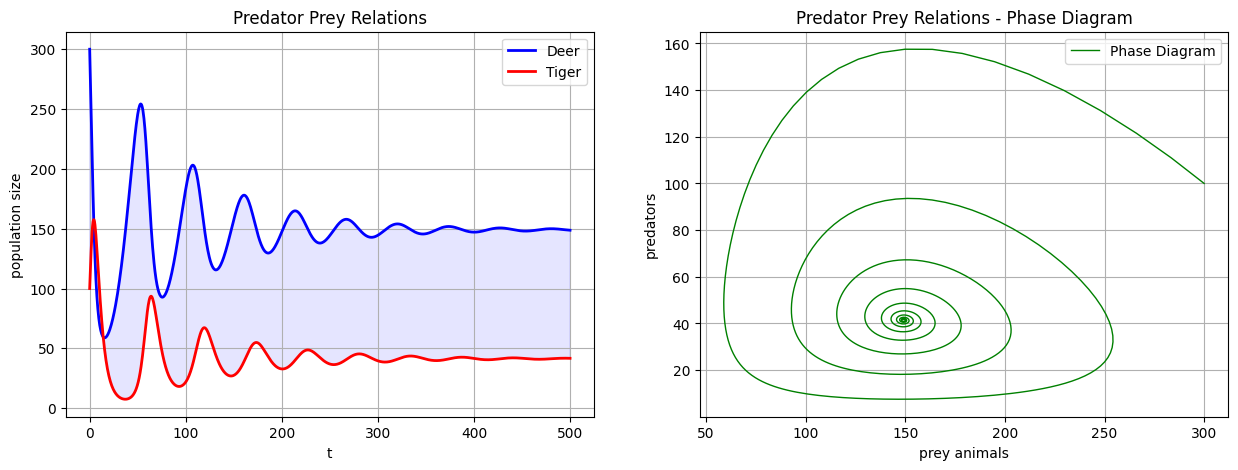

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# parameters for predatorPrey
alpha    = 0.08
beta     = 0.0015
gamma    = 0.22
delta    = 0.0015
epsilon1 = 0.00012
epsilon2 = 0.00009


def predatorPrey(X,t):
    Nprey, Npred = X
    dNpreydt = alpha*Nprey - beta*Nprey*Npred - epsilon1*Nprey*Nprey
    dNpreddt = -gamma*Npred + delta*Nprey*Npred - epsilon2*Npred*Npred
    return [dNpreydt, dNpreddt]


PredPreyInit = [300,100]
t = np.linspace(0, 500, 1001)
sol = odeint(predatorPrey,PredPreyInit,t)


Nprey, Npred = sol.T

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(t, Nprey, color='b', label='Deer', linewidth=2)
plt.plot(t, Npred, color='r', label='Tiger', linewidth=2)
plt.xlabel('t')
plt.ylabel('population size')   
plt.title('Predator Prey Relations')
plt.grid() 
plt.fill_between(t, Nprey, Npred, where = Nprey >= Npred, color='blue', alpha=0.1)    
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(Nprey, Npred, 'g', label='Phase Diagram', linewidth=1)
plt.xlabel('prey animals')
plt.ylabel('predators')   
plt.title('Predator Prey Relations - Phase Diagram')
plt.grid() 
plt.legend(loc='best')
plt.show()

# Interactive

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact

# time array and initial values
t = np.linspace(0, 500, 1001) # for 500 years
PredPreyInit = [300,100]

def predatorPrey(X, t, alpha, beta, gamma, delta, epsilon1, epsilon2):
    Nprey, Npred = X
    dNpreydt = alpha*Nprey - beta*Nprey*Npred - epsilon1*Nprey*Nprey
    dNpreddt = -gamma*Npred + delta*Nprey*Npred - epsilon2*Npred*Npred
    return [dNpreydt, dNpreddt]


def interactPlot(alpha, beta, gamma, delta, epsilon1, epsilon2):
    sol = odeint(predatorPrey, PredPreyInit, t, args=(alpha, beta, gamma, delta, epsilon1, epsilon2))
    Nprey, Npred = sol.T

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(t, Nprey, color='b', label='Deer', linewidth=2)
    plt.plot(t, Npred, color='r', label='Tiger', linewidth=2)
    plt.xlabel('t')
    plt.ylabel('population size')   
    plt.title('Predator Prey Relations')
    plt.grid() 
    plt.fill_between(t, Nprey, Npred, where = Nprey >= Npred, color='blue', alpha=0.1)    
    plt.legend(loc='best')

    plt.subplot(1,2,2)
    plt.plot(Nprey, Npred, 'g', label='Phase Diagram', linewidth=1)
    plt.xlabel('prey animals')
    plt.ylabel('predators')   
    plt.title('Predator Prey Relations - Phase Diagram')
    plt.grid() 
    plt.legend(loc='best')
    plt.show()

interact(interactPlot, 
         alpha=(0.01, 0.1, 0.01), 
         beta=(0.001, 0.005, 0.0005), 
         gamma=(0.1, 0.3 , 0.01), 
         delta=(0.001, 0.005, 0.0005), 
         epsilon1=(0.00005, 0.00015, 0.00001), 
         epsilon2=(0.00005, 0.00015, 0.00001))

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.1, min=0.01, step=0.01), FloatSlider(…

<function __main__.interactPlot(alpha, beta, gamma, delta, epsilon1, epsilon2)>

# Virus Example Question

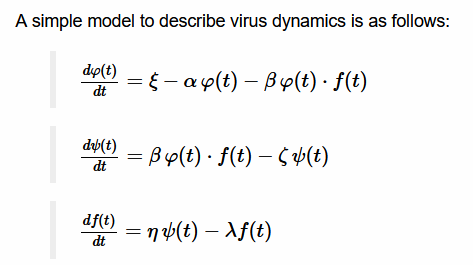

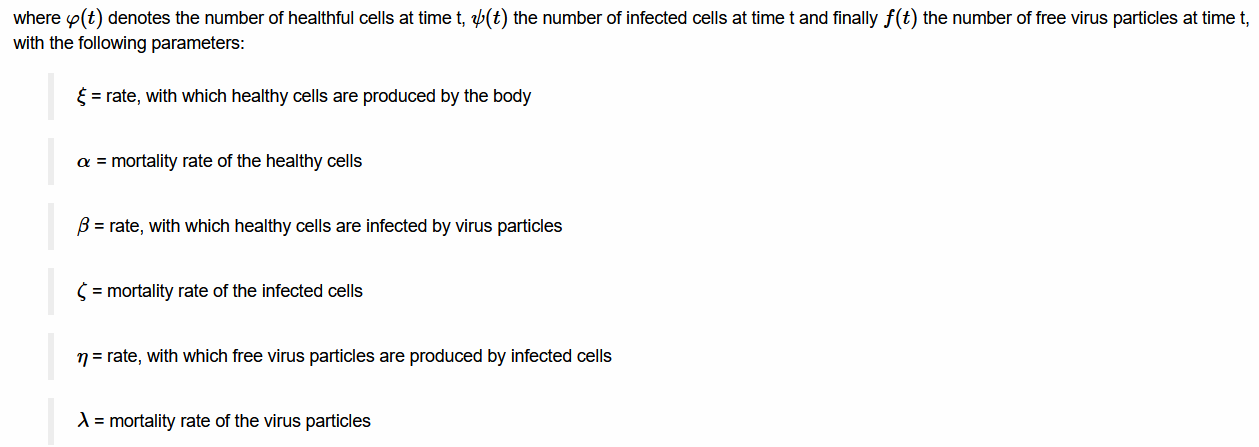

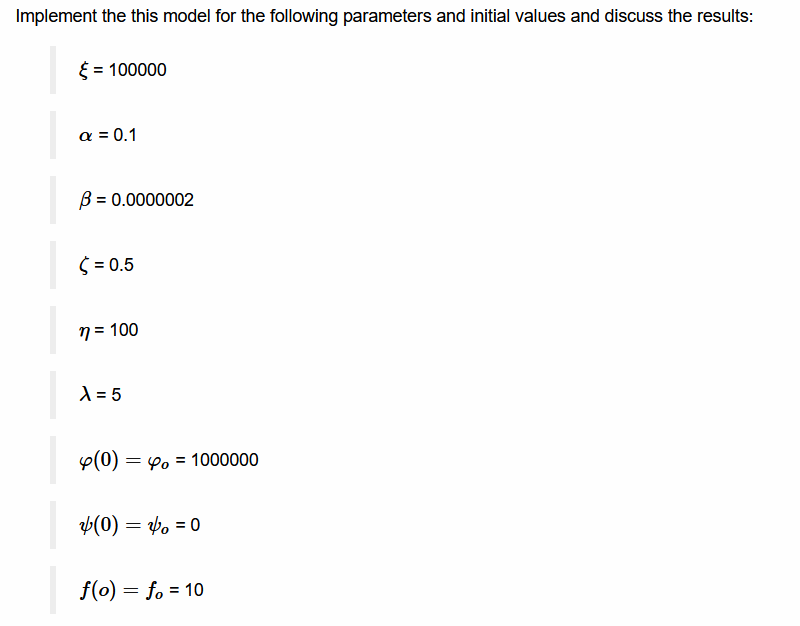


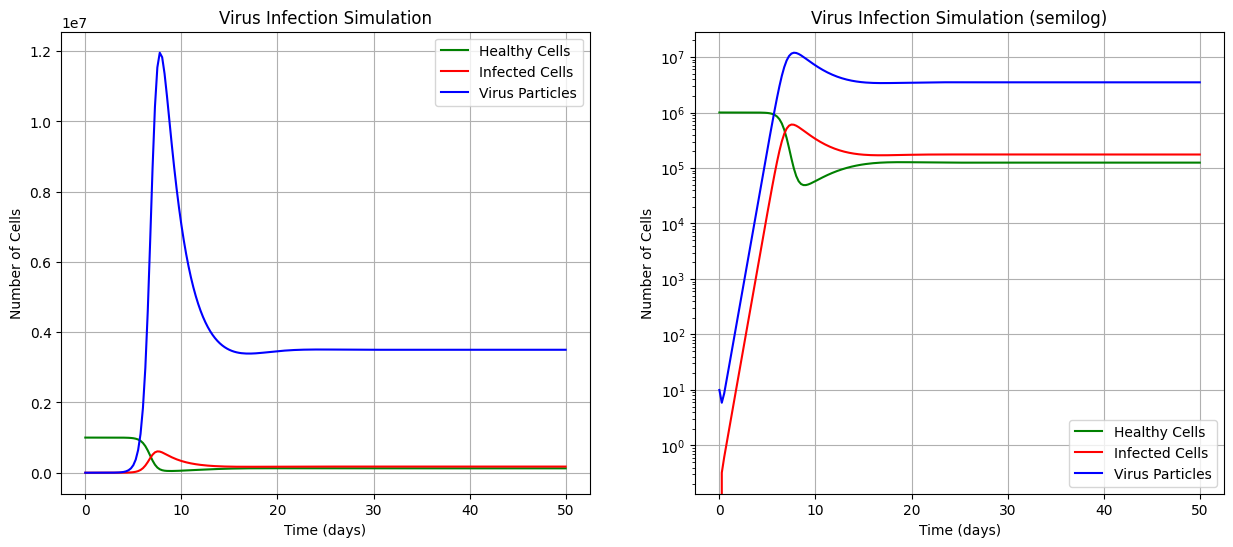

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# define the parameters
xi = 100000
alpha = 0.1
beta = 0.0000002
zeta = 0.5
eta = 100
lam = 5

#define initial values and time array
initial_values = [1000000, 0, 10]
t = np.linspace(0, 50, 201) # time array for 100 days

#define function; non-linear ode model
def virus_model(X, t): # X here is initial values
    phi = X[0] # initial number of healthy cells
    psi = X[1] # initial number of infected cells
    f = X[2] # number of virus particles
    dphidt = xi - alpha*phi - beta*phi*f
    dpsidt = beta*phi*f - zeta*psi
    dfdt = eta*psi - lam*f
    return [dphidt, dpsidt, dfdt]

#solve
sol = odeint(virus_model, initial_values, t)
phi, psi, f = sol.T


plt.figure(figsize=(15, 6))
# line plot; linear scale
plt.subplot(1, 2, 1)
plt.plot(t, phi, 'g', label='Healthy Cells')
plt.plot(t, psi, 'r', label='Infected Cells')
plt.plot(t, f, 'b', label='Virus Particles')
plt.title('Virus Infection Simulation')
plt.xlabel('Time (days)')
plt.ylabel('Number of Cells')
plt.legend(loc='best')
plt.grid()
# semilog plot
plt.subplot(1, 2, 2)
plt.semilogy(t, phi, 'g', label='Healthy Cells')
plt.semilogy(t, psi, 'r', label='Infected Cells')
plt.semilogy(t, f, 'b', label='Virus Particles')
plt.title('Virus Infection Simulation (semilog)')
plt.xlabel('Time (days)')
plt.ylabel('Number of Cells')
plt.legend(loc='best')
plt.grid()
# save figure
plt.savefig('Virus Model Simulation', dpi=300)
plt.show()

# Interactive

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact


#define initial values and time array
initial_values = [1000000, 0, 10]
t = np.linspace(0, 50, 201) # time array for 100 days

#define function; non-linear ode model
def virus_model(X, t, xi, alpha, beta, zeta, eta, lam): # X here is initial values
    phi = X[0] # initial number of healthy cells
    psi = X[1] # initial number of infected cells
    f = X[2] # number of virus particles
    dphidt = xi - alpha*phi - beta*phi*f
    dpsidt = beta*phi*f - zeta*psi
    dfdt = eta*psi - lam*f
    return [dphidt, dpsidt, dfdt]


def interactivePlot(xi, alpha, beta, zeta, eta, lam):
    #solve
    sol = odeint(virus_model, initial_values, t, args=(xi, alpha, beta, zeta, eta, lam))
    phi, psi, f = sol.T


    plt.figure(figsize=(15, 6))
    # line plot; linear scale
    plt.subplot(1, 2, 1)
    plt.plot(t, phi, 'g', label='Healthy Cells')
    plt.plot(t, psi, 'r', label='Infected Cells')
    plt.plot(t, f, 'b', label='Virus Particles')
    plt.title('Virus Infection Simulation')
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Cells')
    plt.legend(loc='best')
    plt.grid()
    # semilog plot
    plt.subplot(1, 2, 2)
    plt.semilogy(t, phi, 'g', label='Healthy Cells')
    plt.semilogy(t, psi, 'r', label='Infected Cells')
    plt.semilogy(t, f, 'b', label='Virus Particles')
    plt.title('Virus Infection Simulation (semilog)')
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Cells')
    plt.legend(loc='best')
    plt.grid()
    # save figure
    plt.savefig('Virus Model Simulation', dpi=300)
    plt.show()


interact(interactivePlot,
        xi=(50000, 150000, 5000),
        alpha=(0.05, 0.15, 0.01),
        beta=(0.0000001, 0.0000005, 0.0000001),
        zeta=(0.1, 1, 0.1),
        eta=(50, 150, 10),
        lam=(1, 10, 1))

interactive(children=(IntSlider(value=100000, description='xi', max=150000, min=50000, step=5000), FloatSlider…

<function __main__.interactivePlot(xi, alpha, beta, zeta, eta, lam)>